In [4]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all primary signal and cycle second observations per minute.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

tp = things_provider.ThingsProvider()
tp.filter_only_primary_signal_and_cycle_second_datastreams()
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_minute_query = query_builder.get_observations_per_minute_query(datastream_ids, False)
print(observations_per_minute_query)
observations_per_minute_rows = db.execute_query(observations_per_minute_query)

observations_per_minute_timestamp_counts = {}

for row in observations_per_minute_rows:
    observations_per_minute_timestamp_counts[str(row[1] * 60)] = row[0]
    
db.close()
    
with open('outputs/observations_per_minute_timestamp_counts.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_minute_timestamp_counts, fp)

Amount of datastreams: 39657
Amount of datastream ids: 39657

    SELECT
        COUNT(*) as count,
        FLOOR(phenomenon_time/60) as rounded_phenomenon_time
    FROM
        observation_dbs
    WHERE
        datastream_id IN (8,15,16,6,7,19,5,27,9,18,25,10,14,11,428,11874,2844,4492,7489,922,730,1417,2190,888,1883,1331,437,4475,4090,2206,11901,674,1842,2958,4687,2888,1444,4685,374,4539,584,7645,835,4639,838,1191,14838,1951,4580,1676,11868,791,989,160,11883,615,1640,11897,666,15206,407,4553,3161,1702,2915,4500,1572,4549,400,1838,4873,3265,150,4829,1791,106,427,12424,445,12436,1552,12441,2866,1227,495,458,1578,646,4509,1667,11037,789,12371,772,1267,818,3053,1014,1894,802,3077,1616,3095,2877,1575,12361,998,281,12338,1100,12342,61,3669,2251,937,12353,267,12347,1500,1619,1559,5701,3744,1880,15474,3183,1670,1787,12375,3145,84,1662,1698,708,1465,1564,3236,1609,5137,2658,1748,5584,263,2718,429,1398,2876,14816,143,4833,1458,4938,1237,2807,1753,14885,289,3211,1364,2910,1707,5606,706,9076,2997

In [2]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all primary signal observations per minute for bike things.
"""

import json

from studies import db
from studies.observations_per_minute import query_builder
from preparations import things_provider

tp = things_provider.ThingsProvider()
tp.filter_only_bike_things()
tp.filter_only_primary_signal_datastreams()
primary_signal_datastream_ids_bike = tp.get_datastream_ids()

db = db.DBClient()
primary_signal_observations_per_minute_query_bike = query_builder.get_observations_per_minute_query(primary_signal_datastream_ids_bike, False)
primary_signal_observations_per_minute_rows_bike = db.execute_query(primary_signal_observations_per_minute_query_bike)


primary_signal_observations_per_minute_timestamp_counts_bike = {}

for row in primary_signal_observations_per_minute_rows_bike:
    primary_signal_observations_per_minute_timestamp_counts_bike[str(row[1] * 60)] = row[0]

db.close()
    
with open('outputs/primary_signal_observations_per_minute_timestamp_counts_bike.json', 'w', encoding='utf-8') as fp:
    json.dump(primary_signal_observations_per_minute_timestamp_counts_bike, fp)

Amount of datastreams: 5418
Amount of datastream ids: 5418


In [3]:

# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all primary signal observations per minute for bike things (only mqtt).
"""

import json

from studies import db
from studies.observations_per_minute import query_builder
from preparations import things_provider

tp = things_provider.ThingsProvider()
tp.filter_only_bike_things()
tp.filter_only_primary_signal_datastreams()
primary_signal_datastream_ids_bike = tp.get_datastream_ids()

db = db.DBClient()
primary_signal_observations_per_minute_query_bike_mqtt = query_builder.get_observations_per_minute_query(primary_signal_datastream_ids_bike, True)
primary_signal_observations_per_minute_rows_bike_mqtt = db.execute_query(primary_signal_observations_per_minute_query_bike_mqtt)

primary_signal_observations_per_minute_timestamp_counts_bike_mqtt = {}

for row in primary_signal_observations_per_minute_rows_bike_mqtt:
    primary_signal_observations_per_minute_timestamp_counts_bike_mqtt[str(row[1] * 60)] = row[0]
    
db.close()
    
with open('outputs/primary_signal_observations_per_minute_timestamp_counts_bike_mqtt.json', 'w', encoding='utf-8') as fp:
    json.dump(primary_signal_observations_per_minute_timestamp_counts_bike_mqtt, fp)

Amount of datastreams: 5418
Amount of datastream ids: 5418


In [2]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all car detector observations per hour.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

layer_name = 'detector_car'

tp = things_provider.ThingsProvider()
tp.filter_custom_layer_name(layer_name)
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_hour_query = query_builder.get_observations_per_hour_query(datastream_ids)
observations_per_hour_rows = db.execute_query(observations_per_hour_query)

observations_per_hour_timestamp_counts = {}

for row in observations_per_hour_rows:
    observations_per_hour_timestamp_counts[str(row[1] * 3600)] = row[0]

db.close()

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_hour_timestamp_counts, fp)



Amount of datastreams: 6483
Amount of datastream ids: 6483


NameError: name 'observations_per_minute_timestamp_counts' is not defined

In [8]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all bus checkout observations per hour.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

layer_name = 'bus_checkout'

tp = things_provider.ThingsProvider()
tp.filter_custom_layer_name(layer_name)
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_hour_query = query_builder.get_observations_per_hour_query(datastream_ids)
observations_per_hour_rows = db.execute_query(observations_per_hour_query)

observations_per_hour_timestamp_counts = {}

for row in observations_per_hour_rows:
    observations_per_hour_timestamp_counts[str(row[1] * 3600)] = row[0]

db.close()

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_hour_timestamp_counts, fp)



Amount of datastreams: 702
Amount of datastream ids: 702


In [9]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all bus request point observations per hour.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

layer_name = 'bus_request_point'

tp = things_provider.ThingsProvider()
tp.filter_custom_layer_name(layer_name)
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_hour_query = query_builder.get_observations_per_hour_query(datastream_ids)
observations_per_hour_rows = db.execute_query(observations_per_hour_query)

observations_per_hour_timestamp_counts = {}

for row in observations_per_hour_rows:
    observations_per_hour_timestamp_counts[str(row[1] * 3600)] = row[0]

db.close()

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_hour_timestamp_counts, fp)



Amount of datastreams: 693
Amount of datastream ids: 693


In [10]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all secondary_signal observations per hour.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

layer_name = 'secondary_signal'

tp = things_provider.ThingsProvider()
tp.filter_custom_layer_name(layer_name)
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_hour_query = query_builder.get_observations_per_hour_query(datastream_ids)
observations_per_hour_rows = db.execute_query(observations_per_hour_query)

observations_per_hour_timestamp_counts = {}

for row in observations_per_hour_rows:
    observations_per_hour_timestamp_counts[str(row[1] * 3600)] = row[0]

db.close()

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_hour_timestamp_counts, fp)



Amount of datastreams: 632
Amount of datastream ids: 632


In [11]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all detector_cyclists observations per hour.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

layer_name = 'detector_cyclists'

tp = things_provider.ThingsProvider()
tp.filter_custom_layer_name(layer_name)
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_hour_query = query_builder.get_observations_per_hour_query(datastream_ids)
observations_per_hour_rows = db.execute_query(observations_per_hour_query)

observations_per_hour_timestamp_counts = {}

for row in observations_per_hour_rows:
    observations_per_hour_timestamp_counts[str(row[1] * 3600)] = row[0]

db.close()

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_hour_timestamp_counts, fp)



Amount of datastreams: 1941
Amount of datastream ids: 1941


In [12]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all detector_pedestrian observations per hour.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

layer_name = 'detector_pedestrian'

tp = things_provider.ThingsProvider()
tp.filter_custom_layer_name(layer_name)
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_hour_query = query_builder.get_observations_per_hour_query(datastream_ids)
observations_per_hour_rows = db.execute_query(observations_per_hour_query)

observations_per_hour_timestamp_counts = {}

for row in observations_per_hour_rows:
    observations_per_hour_timestamp_counts[str(row[1] * 3600)] = row[0]

db.close()

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_hour_timestamp_counts, fp)



Amount of datastreams: 2835
Amount of datastream ids: 2835


In [13]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all acoustic_signal observations per hour.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

layer_name = 'acoustic_signal'

tp = things_provider.ThingsProvider()
tp.filter_custom_layer_name(layer_name)
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_hour_query = query_builder.get_observations_per_hour_query(datastream_ids)
observations_per_hour_rows = db.execute_query(observations_per_hour_query)

observations_per_hour_timestamp_counts = {}

for row in observations_per_hour_rows:
    observations_per_hour_timestamp_counts[str(row[1] * 3600)] = row[0]

db.close()

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_hour_timestamp_counts, fp)



Amount of datastreams: 2523
Amount of datastream ids: 2523


In [14]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all detector_acoustic_traffic_request observations per hour.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

layer_name = 'detector_acoustic_traffic_request'

tp = things_provider.ThingsProvider()
tp.filter_custom_layer_name(layer_name)
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_hour_query = query_builder.get_observations_per_hour_query(datastream_ids)
observations_per_hour_rows = db.execute_query(observations_per_hour_query)

observations_per_hour_timestamp_counts = {}

for row in observations_per_hour_rows:
    observations_per_hour_timestamp_counts[str(row[1] * 3600)] = row[0]

db.close()

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_hour_timestamp_counts, fp)



Amount of datastreams: 3451
Amount of datastream ids: 3451


In [15]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all bus_pre-request_point observations per hour.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

layer_name = 'bus_pre-request_point'

tp = things_provider.ThingsProvider()
tp.filter_custom_layer_name(layer_name)
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_hour_query = query_builder.get_observations_per_hour_query(datastream_ids)
observations_per_hour_rows = db.execute_query(observations_per_hour_query)

observations_per_hour_timestamp_counts = {}

for row in observations_per_hour_rows:
    observations_per_hour_timestamp_counts[str(row[1] * 3600)] = row[0]

db.close()

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_hour_timestamp_counts, fp)



Amount of datastreams: 665
Amount of datastream ids: 665


In [16]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Get all auxiliary_signal observations per hour.
"""

import json

from studies import db
from studies.observations_per_minute.lib import query_builder
from preparations import things_provider

layer_name = 'auxiliary_signal'

tp = things_provider.ThingsProvider()
tp.filter_custom_layer_name(layer_name)
datastream_ids = tp.get_datastream_ids()

db = db.DBClient(100000, 1)
observations_per_hour_query = query_builder.get_observations_per_hour_query(datastream_ids)
observations_per_hour_rows = db.execute_query(observations_per_hour_query)

observations_per_hour_timestamp_counts = {}

for row in observations_per_hour_rows:
    observations_per_hour_timestamp_counts[str(row[1] * 3600)] = row[0]

db.close()

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'w', encoding='utf-8') as fp:
    json.dump(observations_per_hour_timestamp_counts, fp)



Amount of datastreams: 4
Amount of datastream ids: 4


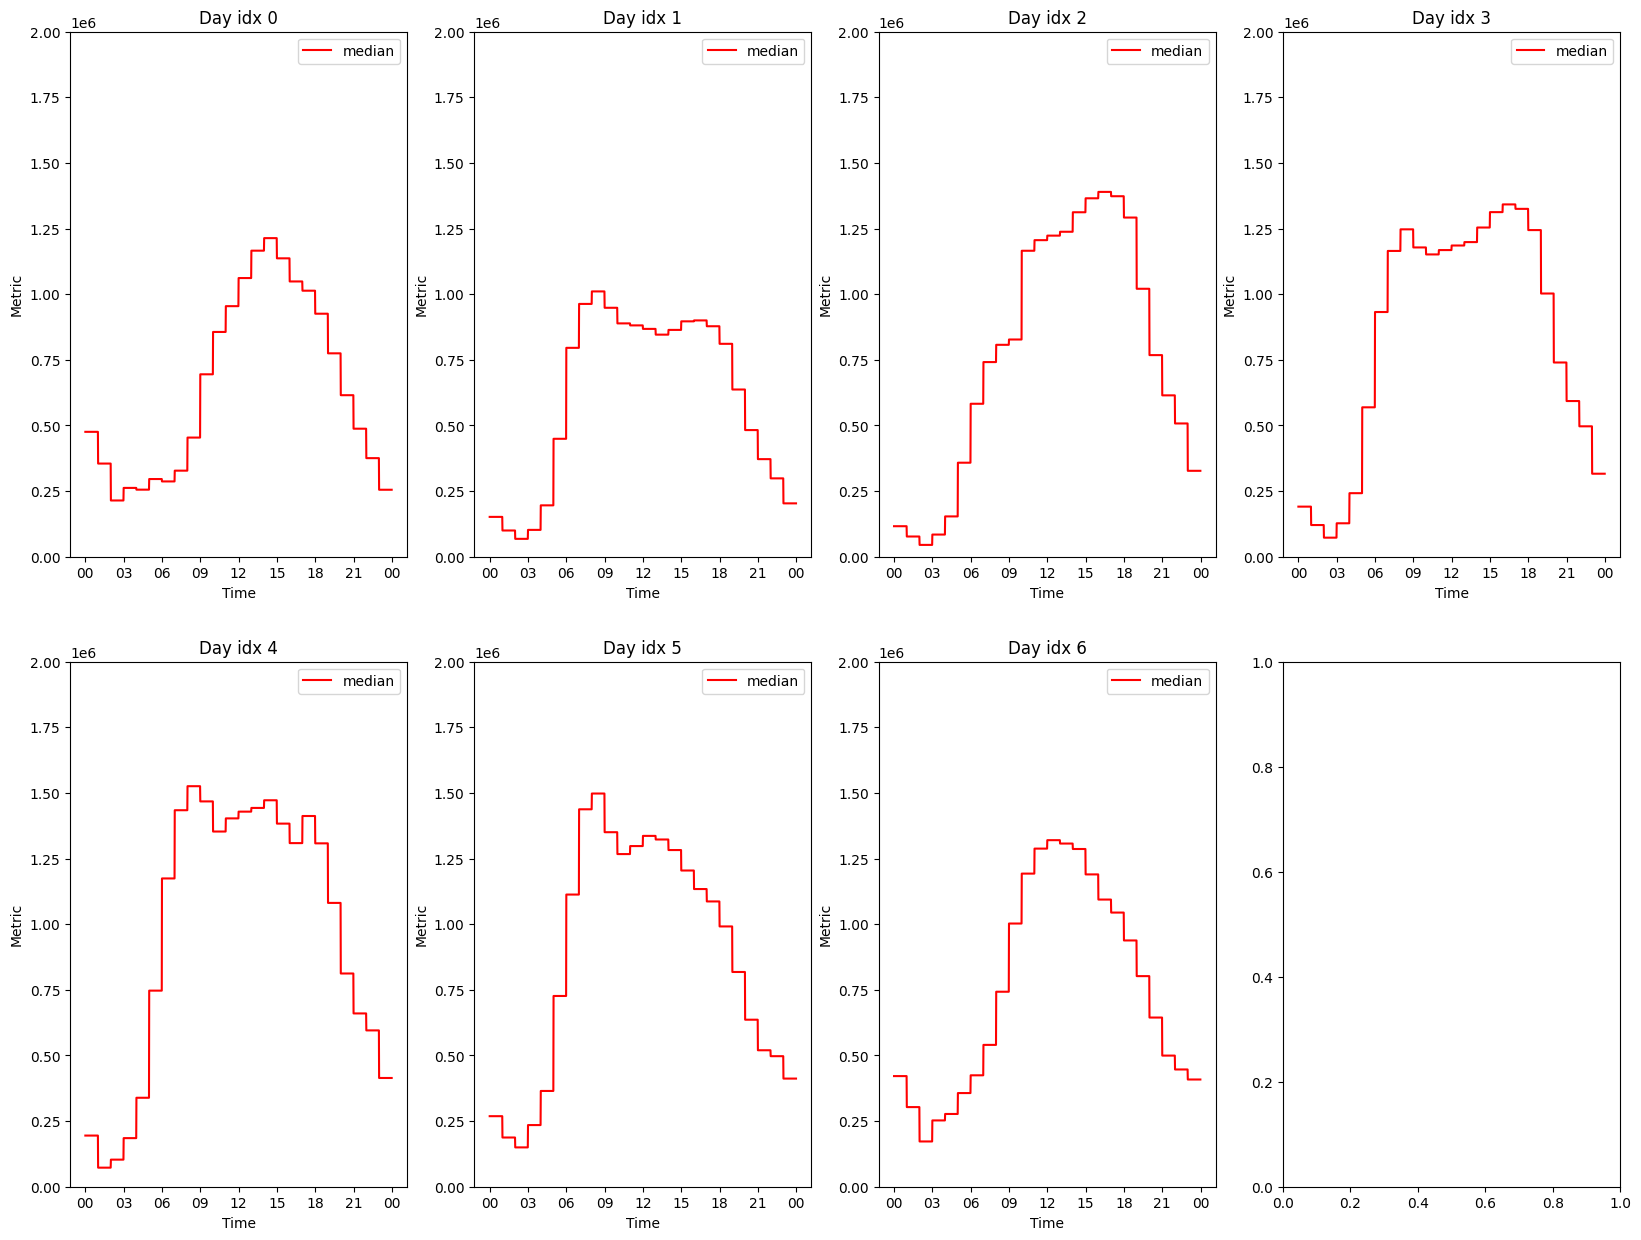

In [7]:
# Prepare import of modules from parent directory.
import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

"""
Aggregate all car detector observations per hour.
"""

import json
import collections
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

layer_name = 'detector_car'

with open(f'outputs/observations_per_hour_timestamp_counts_{layer_name}.json', 'r', encoding='utf-8') as fp:
    observations_per_hour_timestamp_counts = json.load(fp)
    
observations_per_hour_timestamp_counts_ordered = collections.OrderedDict(sorted(observations_per_hour_timestamp_counts.items(), reverse=True))

observations_per_hour_timestamp_counts_aggregated = [
    [
        [] for j in range(24)    
    ] for i in range(7)
]

day_idx = 4
hour_idx = 23
day_count = 0

factor = 7*24*3600
    
for timestamp, count in observations_per_hour_timestamp_counts_ordered.items():
    # End time (took von times.go code)
    """ location, err := time.LoadLocation("Europe/Berlin")
	if err != nil {
		panic(err)
	}
	endDate := time.Date(2023, 10, 20, 0, 0, 0, 0, location) """
    int_timestamp = int(timestamp.replace(".0", ""))
    if int_timestamp >= 1697752800:
        continue
    
    last_count = count
    third_count = observations_per_hour_timestamp_counts_ordered[str(int_timestamp - (1 * factor)) + ".0"]
    second_count = observations_per_hour_timestamp_counts_ordered[str(int_timestamp - (2 * factor)) + ".0"]
    first_count = observations_per_hour_timestamp_counts_ordered[str(int_timestamp - (3 * factor)) + ".0"]
    
    observations_per_hour_timestamp_counts_aggregated[day_idx][hour_idx] = [first_count, second_count, third_count, last_count]
    
    first_datetime = datetime.datetime.fromtimestamp(int_timestamp - (3 * factor))
    second_datetime = datetime.datetime.fromtimestamp(int_timestamp - (2 * factor))
    third_datetime = datetime.datetime.fromtimestamp(int_timestamp - (1 * factor))
    last_datetime = datetime.datetime.fromtimestamp(int_timestamp)
    
    if first_datetime.weekday() != second_datetime.weekday() or first_datetime.weekday() != third_datetime.weekday() or first_datetime.weekday() != last_datetime.weekday():
        raise Exception("Days do not match")
    if first_datetime.hour != second_datetime.hour or first_datetime.hour != third_datetime.hour or first_datetime.hour != last_datetime.hour:
        raise Exception("Hours do not match")
    if first_datetime.minute != 0 or second_datetime.minute != 0 or third_datetime.minute != 0 or last_datetime.minute != 0:
        raise Exception("Minutes do not match")
    if first_datetime.second != 0 or second_datetime.second != 0 or third_datetime.second != 0 or last_datetime.second != 0:
        raise Exception("Seconds do not match")
    
    if first_datetime.hour != hour_idx:
        raise Exception("Hours do not match")
    if first_datetime.weekday() != (day_idx - 1) % 7:
        raise Exception("Days do not match")
    
    hour_idx -= 1
    
    if hour_idx < 0:
        hour_idx = 23
        day_idx -= 1 % 7
        day_count += 1
    
    if day_count > 6:
        break
    
observations_per_hour_timestamp_counts_median = [
    [
        -1 for j in range(24)    
    ] for i in range(7)
]

for dayIdx in range(7):
    for hourIdx in range(24):
        observations_per_hour_timestamp_counts_median[dayIdx][hourIdx] = np.median(np.array(observations_per_hour_timestamp_counts_aggregated[dayIdx][hourIdx]))
        
hours = []
for i in range(24):
    hours.append(datetime.datetime(day=20, month=10, year=2023, hour=i, minute=0))
    hours.append(datetime.datetime(day=20, month=10, year=2023, hour=i, minute=59))
    
fig, ax = plt.subplots(2, 4, figsize=(20, 15))

for j in range(ax.shape[0]):
    for i in range(ax.shape[1]):
        day_idx = i + j * ax.shape[1]
        if day_idx >= 7:
            continue
        
        single_ax = ax[j][i]

        median_values = []
        
        for hour_idx in range(24):
            median_values.append(observations_per_hour_timestamp_counts_median[day_idx][hour_idx])
            median_values.append(observations_per_hour_timestamp_counts_median[day_idx][hour_idx])
        
        single_ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
        single_ax.plot(hours, median_values, label="median", color='red', alpha=1)
        single_ax.set_ylim(0, 2000000)
        single_ax.set_xlabel('Time')
        single_ax.set_ylabel('Metric')
        single_ax.set_title(f"Day idx {str(day_idx)}")
        single_ax.legend()
    